<a href="https://colab.research.google.com/github/yimuzy/Is20f/blob/master/xuan/Heston_standardized_and_speed_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy import *
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

In [ ]:
# Incorrect method , ignore this part

class Heston:

    def __init__(self, S0, v0, r, kappa, theta, xi, rho):
        self.S0 = S0
        self.v0 = v0
        self.r = r
        self.kappa = kappa
        self.theta = theta
        self.xi = xi
        self.rho = rho

    def F_function(self, T , status, lambda_, phi):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        if status == 1:
            u = 0.5
            b = kappa - rho * xi + lambda_
        else:
            u = -0.5
            b = kappa + lambda_
        a = kappa * theta
        x = log(s0)
        d = sqrt((rho * xi * phi * 1j - b)**2 - xi**2 * (2 * u * phi * 1j - phi**2))
        g = (b - rho * xi * phi * 1j + d) / (b - rho * xi * phi * 1j - d)
        C = r * phi * 1j * T + (a / xi**2)*((b - rho * xi * phi * 1j + d) * T - 2 * log((1 - g * exp(d * T))/(1 - g)))
        D = (b - rho * xi * phi * 1j + d) / xi**2 * ((1 - exp(d * T)) / (1 - g * exp(d * T)))
        return exp(C + D * v0 + 1j * phi * x)
        

    def P_function(self, T , status, lambda_, K):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        integ = lambda phi: (exp(-1j * phi * log(K)) * self.F_function(T , status, lambda_, phi) / (1j * phi)).real
        return (0.5 + (1 / pi) * quad(integ, 0, 150)[0])

    def Call_price(self, T, K, lambda_):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        p1 = self.P_function(T,1,lambda_,K)
        p2 = self.P_function(T,2,lambda_,K)
        return (s0 * p1 - K * exp(-r * T) * p2)

    def SimpsonW(self, N,eta):
        delt = np.zeros(N, dtype=np.float)
        delt[0] = 1
        j = np.arange(1, N + 1, 1)
        SimpsonW = eta*(3 + (-1) ** j - delt) / 3
        return SimpsonW

    def error_function(self, alpha):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        T = 10
        k = np.log(80)
        lambda_ = 0
        error = 0
        N =2**10
        eta = 150/N
        v = np.asarray([i*eta for i in range(N)])
        Psi = np.asarray([self.F_function(T , 2, lambda_, (vj-(alpha+1)*1j))  for vj in v])
        ps =  (np.exp(1j*(-k)*v) * np.exp(-r*T) * Psi/(alpha + alpha**2 - v**2 + 1j*v*(2*alpha+1))).real
        for i in range(len(ps)):
          error += (np.log(ps[i]) - alpha*k)**2
        return error

    def Hestonfft(self, T,K,lambda_):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        k = np.log(K)
        x0 = np.log(s0)   
        N =2**10
        alpha = 1.5
        eta = 150/N
        lambda1 = 2 * np.pi / (N *eta)
        beta= x0 - lambda1*N/2
        b = 0.5 * N * lambda1
        km = np.asarray([beta+i*lambda1 for i in range(N)])
        W = self.SimpsonW(N,eta)
        v = np.asarray([i*eta for i in range(N)])
        Psi = np.asarray([self.F_function(T , 2, lambda_, (vj-(alpha+1)*1j))  for vj in v])
        FFTFunc = W * np.exp(1j*(b-x0)*v) * np.exp(-r*T) * Psi/(alpha + alpha**2 - v**2 + 1j*v*(2*alpha+1))

        y = np.fft.fft(FFTFunc).real
        cT = eta * np.exp(-alpha * km) * y/np.pi

        ymin = (xi - 2*k*rho - np.sqrt(xi**2+4*k**2-4*k*rho*xi))/(2*xi*(1-rho**2))
        ymax = (xi - 2*k*rho - np.sqrt(xi**2+4*k**2-4*k*rho*xi))/(2*xi*(1-rho**2))
        
        #alpha1 = so.fmin(self.error_function, alpha, disp = 0)[0]

        return np.exp(km),cT#,alpha1



In [ ]:
# Incorrect method , ignore this part
H = Heston(100, 0.0175, 0., 1.5768, 0.0398, 0.5751, -0.5751)
H.Call_price(10, 80, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.log is deprecated and will be remove

10.817302243596643

In [ ]:
# Incorrect method , ignore this part
Km,b=H.Hestonfft(10,80,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.exp is deprecated and will be remove

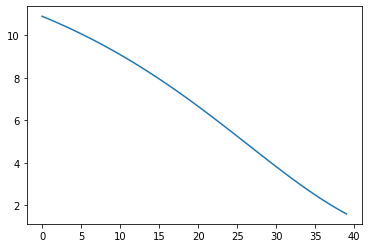

In [ ]:
# Incorrect method , ignore this part
plt.plot(b[480:520])

In [ ]:
# Incorrect method , ignore this part
AS = np.array([H.Call_price(10, K, 0) for K in Km[480:520]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.log is deprecated and will be remove

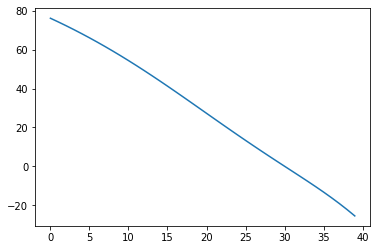

In [ ]:
# Incorrect method , ignore this part
plt.plot(AS)

In [16]:
#Correct model

class Heston:
    def __init__(self, S0, v0, r, kappa, theta, xi, rho):
        self.S0 = S0
        self.v0 = v0
        self.r = r
        self.kappa = kappa
        self.theta = theta
        self.xi = xi
        self.rho = rho
        
    #char func for ln(S_T) from Ng05
    def charfun(self, T, u):
        t1 = self.kappa - self.rho*self.xi*1j*u
        D = np.sqrt(t1**2+(u**2+1j*u)*self.xi**2)
        G = (t1-D)/(t1+D)
        t2 = 1-G*np.exp(-D*T)
        f1 = np.exp(1j*u*(np.log(self.S0+self.r*T)))
        f2 = np.exp(self.v0*(1-np.exp(-D*T))*(t1-D)/self.xi**2/t2)
        f3 = np.exp(self.kappa*self.theta*(
            T*(t1-D)-2*np.log(t2/(1-G)))/self.xi**2)
        return f1*f2*f3

    def psi(self, w, T, alpha):
        r = self.r
        o1 = np.exp(-r*T)
        o1 = o1*self.charfun(T, w - (alpha+1)*1j)
        o2 = alpha**2+alpha-w**2+1j*(2*alpha+1.)*w
        return o1/o2
    
    #carr-madan method with damping
    def price_cm(self, K, T, alpha = 1.5):
        k = np.log(K)
        integrand = lambda w: (np.exp(-1j*w*k)*self.psi(w, T, alpha)).real
        integral = quad(integrand, 0, np.inf)[0]
        return np.exp(-alpha*k)/np.pi*integral

    def SimpsonW(self, N,eta):
        delt = np.zeros(N, dtype=np.float)
        delt[0] = 1
        j = np.arange(1, N + 1, 1)
        SimpsonW = eta*(3 + (-1) ** j - delt) / 3
        return SimpsonW

    def Hestonfft(self, T,K):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        k = np.log(K)
        x0 = np.log(s0)   
        N =2**10
        alpha = 1.5
        eta = 0.15
        lambda1 = 2 * np.pi / (N *eta)
        beta= x0 - lambda1*N/2
        km = np.asarray([beta+i*lambda1 for i in range(N)])
        W = self.SimpsonW(N,eta)
        v = np.asarray([i*eta for i in range(N)])
        Psi = np.asarray([self.psi(vj, T, alpha)  for vj in v])
        FFTFunc = Psi*np.exp(-1j*beta*v)*W

        y=np.fft.fft(FFTFunc).real
        cT=np.exp(-alpha*km)*y/np.pi

        return np.exp(km),cT

    def ft_heston_kseries(self, K,T):
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        rho = self.rho
        v0 = self.v0
        r = self.r
        s0 = self.S0
        k = np.log(K)
        x0 = np.log(s0)   
        N =2**10
        alpha = 1.5
        eta = 0.15
        #lambda1 = 2 * np.pi / (N *eta)
        #beta= x0 - lambda1*N/2
        #km = np.asarray([beta+i*lambda1 for i in range(N)])
        W = self.SimpsonW(N,eta)
        v = np.asarray([i*eta for i in range(N)])
        Psi = np.asarray([self.psi(vj, T, alpha)  for vj in v])
        cT = np.zeros(len(K))
        for i in range(len(K)):
          aaa = Psi*np.exp(-1j*k[i]*v)*W
          aaa_r = np.asarray([p.real for p in aaa])
          y = np.sum(aaa_r)
          cT[i] = np.exp(-alpha*k[i])*y/np.pi

        return cT


In [21]:
# accurate result
H = Heston(100, 0.0175, 0., 1.5768, 0.0398, 0.5751, -0.5751)
H.price_cm(80, 10, alpha = 1.5)

32.57957785990925

In [22]:
# result produced by FFT
k,c= H.Hestonfft(10,80)
print(np.interp(80,k,c))

32.58952680972135


In [23]:
# result produced by FT
c1=H.ft_heston_kseries(k,10)
print(np.interp(80,k,c1))

32.58952680972135


In [24]:
# testing fft speed
H = Heston(100, 0.0175, 0., 1.5768, 0.0398, 0.5751, -0.5751)
%time k,c= H.Hestonfft(10,80)

CPU times: user 45.7 ms, sys: 0 ns, total: 45.7 ms
Wall time: 47.2 ms


In [26]:
# testing ft speed
%time c1=H.ft_heston_kseries(k,10)

CPU times: user 487 ms, sys: 0 ns, total: 487 ms
Wall time: 487 ms


In [28]:
# testing integral method speed
%time c2=np.asarray([H.price_cm(km, 10, alpha = 1.5) for km in k])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


CPU times: user 34 s, sys: 3.95 ms, total: 34 s
Wall time: 34 s


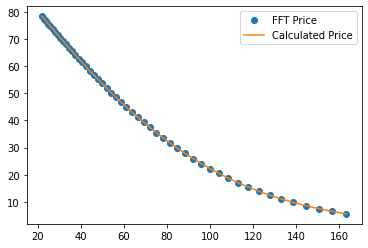

In [30]:
plt.plot(k[475:525],c[475:525],'o',label='FFT Price')
plt.plot(k[475:525],c2[475:525],label='Calculated Price')
plt.legend()

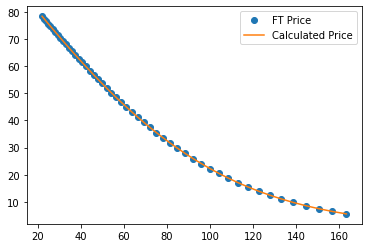

In [33]:
plt.plot(k[475:525],c1[475:525],'o',label='FT Price')
plt.plot(k[475:525],c2[475:525],label='Calculated Price')
plt.legend()